<a href="https://colab.research.google.com/github/souravkarma/Sourav-Karmakar-Bike-Sharing-Demand/blob/main/Sourav_Karmakar_Bike_Sharing_Demand_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Abstract:**

**Bike sharing** is a transport service which mainly focuses to lend conventional or electrical bikes to an individual or a group of individuals for an hour, a day or for a month depending on the needs.Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis



In market share we can see that Bike Sharing system has a global market share which was valued around 3.39 billion Dollars in 2019 and is projected to grow to 6.98 Billion Dollars by 2027 with a compound annual growth rate of around 14% indicatively from 2020 to 2027.



Several factors such as low bike rent, increase in capital investments,introduction of e-bikes in the market, technological advancement and government schemes for development of several bike-sharing infrastructure has increased the overall market share and led to the introduction of several opportunities during the forecasted year. However, rise in bike theft and huge initial investment are some of the key factors in order to hinder expected market growth.



Keywords: *Bike-Sharing, Data Mining, Predictive Analysis, Linear Regression, Machine Learning.*


#**Introduction:**
Bike sharing system demand nowadays is increasing in proportional manners globally. This system has gained a lot of  attention with its cost effective system and easy to use nature. This system has already attracted a huge customer base globally like in South Korea, São Paulo ,China and Australia.
Bike sharing system generally rents bikes on an hour, day and month basis and is generally based on static pricing inclusive of hour,days or month. Because of its affordability and easy renting system anyone can commute on arrival. 
According to our problem our main aim is to build a predictive model so as to find the number of bikes rented based on the given dataset.



#<b> Problem Description </b>

Many urban cities introduce rental bikes for good accessibility purposes. It is important to make the rental bike available to the public at the right time as it makes our life easier and faster. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#<b> Data Description </b>

###<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required modules and loading dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{'grid.linestyle': '--'})


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
a_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv',encoding = 'unicode_escape')
a_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#getting the shape of data
a_df.shape

(8760, 14)

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Here we can see there are
* 6 **float**, 4 **int** , 4 **object or str** type data available in the dataset. 
* Also there is 8760 rows and 14 columns or feature. Also there is 8760 not null values. 
We can conclude all of the above after final feature engineering:(i.e feature creation,feature selection etc)

#**Feature Description:-**


* Date : Date feature which is str type is needed to convert it into Datetime format DD/MM/YYYY.
* Hour: Hour feature which is in 24 hour format which tells us number bike rented per hour is int type.
* Temperature(°C): Temperature feature which is in celsius scale(°C) is Float type.
* Humidity(%): Feature humidity in air (%) which is int type.
* Wind speed (m/s) : Wind Speed feature which is in (m/s) is float type.
* Visibility (10m): Visibility feature which is in 10m, is int type.
* Dew point temperature(°C): Dew point Temperature in (°C) which tells us temperature at the start of the day is Float type.
* Solar Radiation (MJ/m2): Solar radiation or UV radiation is Float type.
* Rainfall(mm): Rainfall feature in mm which indicates 1 mm of rainfall which is equal to 1 litre of water per metre square is Float type.
* Snowfall (cm): Snowfall in cm is Float type. Seasons: Season, in this feature four seasons are present in data is str type.
* Holiday: whether no holiday or holiday can be retrieved from this feature is str type.
* Functioning Day: Whether the day is Functioning Day or not can be retrieved from this feature is str type.

#**Exploratory Data Analysis**

**Checking total null/missing values or outliers**

In [ ]:
#Finding null values
a_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#checking duplicate values
len(a_df[a_df.duplicated()])

0

* No duplicate record found
* There are no null values
so, we can proceed furthur

**Breaking down date column in day, month, year**

In [4]:
from datetime import datetime
a_df['Date']=a_df['Date'].astype('datetime64[ns]')
a_df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [5]:
#creating seperate daay,month,year column
a_df['Day']=a_df['Date'].dt.day_name()
a_df['Month']=a_df['Date'].dt.month
a_df['Year']=a_df['Date'].dt.year

In [ ]:
a_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017


**Let's add new column weekend and weekday**

In [6]:
# Lets add a new column named Weekend with binary values, indicating 1 for weekend and 0 for a weekday
a_df['Weekend']=a_df['Day'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)
a_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018,0
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018,0


In [ ]:
a_df['Year'].unique()

array([2017, 2018])

In [ ]:
a_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
a_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekend'],
      dtype='object')

#**Data Visualization**

**Find out Bike sharing Demand in every month for both holiday and non-holiday**

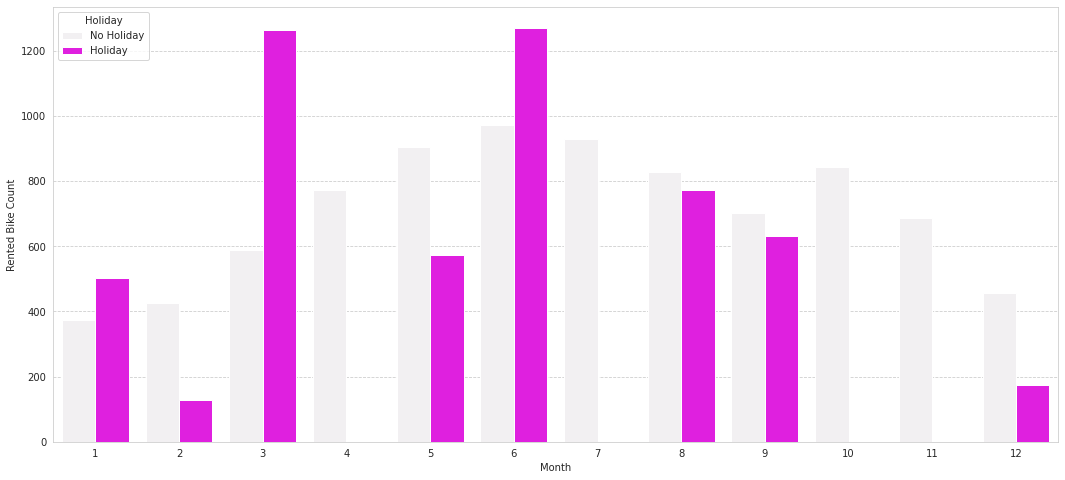

In [ ]:
from matplotlib.figure import rcParams
rcParams['figure.figsize']=18,8
sns.barplot(data=a_df,x='Month',y='Rented Bike Count',color='magenta',ci=None,hue='Holiday')


* In June maximum bike rented near 1000. and january, february enjoys less rented bike demand near 400.
* March and June enjoys more bike sharing demand in holiday than non-holidays
* February,December have less bike sharing demand for both in holidays and non-holidays.
* Above graph shows April,October,December months have nearly zero bike sharing demand in holidays.

**Weekend(1) & Weekdays(0) Bike Sharing Demand Data**

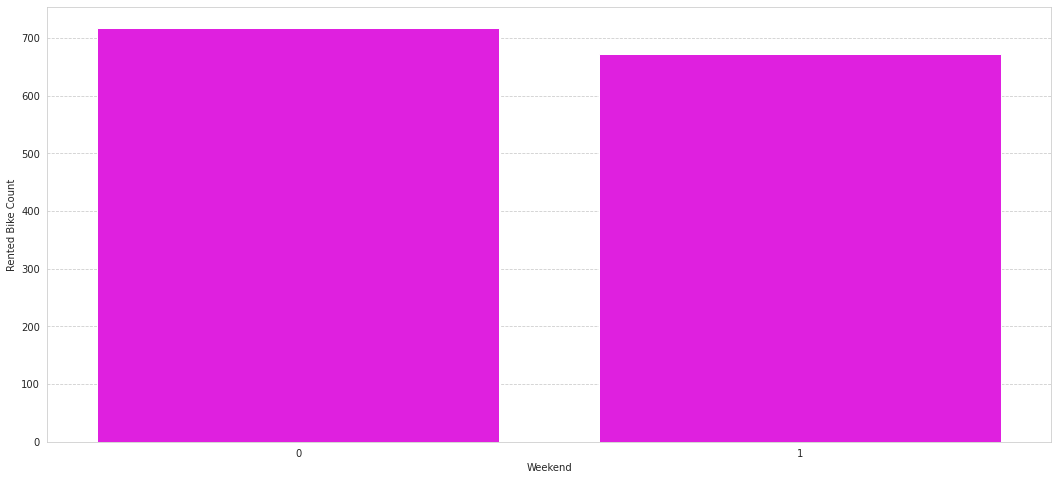

In [ ]:

sns.barplot(data=a_df,x='Weekend',y='Rented Bike Count',color='magenta',ci=None)

* allthough weekdays enjoys more rented bike demand than weekend but difference is not big

**Hourly Rented Bike Count in Weekdays(0) and Weekend(1)**

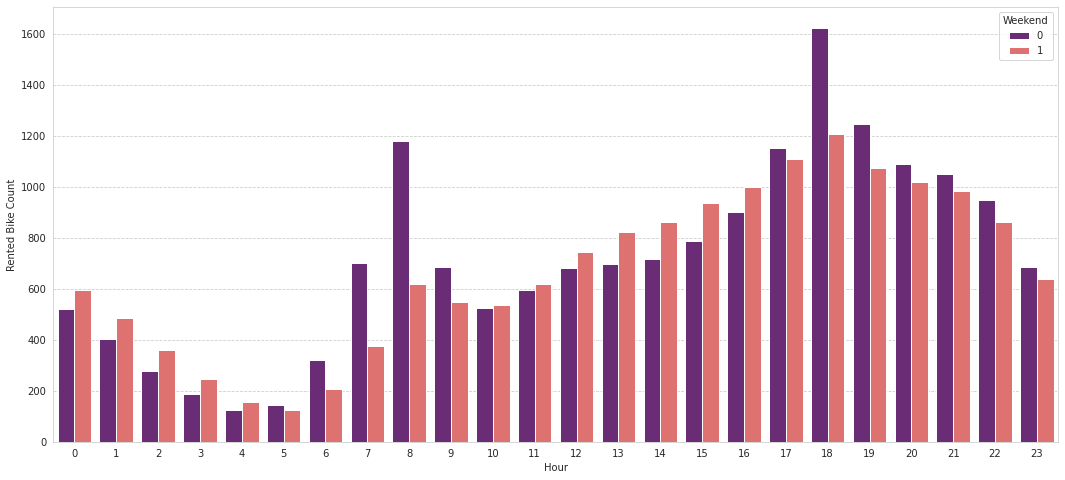

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=a_df,x='Hour',y='Rented Bike Count',color='g',hue='Weekend',ci= None,palette='magma')


* Hour-18 or 6pm shows maximum rented bike demand in both weekdays(above 1600) and weekend (above 1200).
* Hour 4 & Hour 5 (means 4 and 5 am) shows very less rented bike demand in both weekend and weekdays.
* Hour 8 (8 am) shows good rented bike demand in weekdays( near 1200) but in weekend 8am hour has not so good bike sharing demand(near 600)

**Season wise Hourly Rented Bike Count**

In [ ]:
a_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

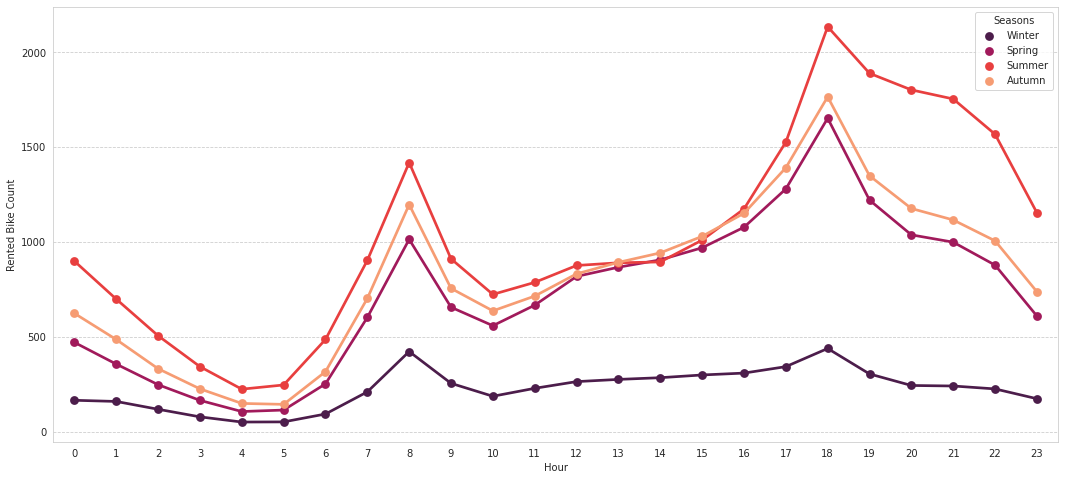

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=a_df,x='Hour',y='Rented Bike Count',color='g',hue='Seasons',ci= None,palette='rocket')


From this visualizalisation we can conclude the following:
 * Summer season enjoys overall best and least bike sharing demand and winter has overall less demand than any other season.
 * Hour-18(6pm) and Hour-8(8am) are two best peak time in any season when bike sharing is in high-demand. 
 * there are not so much difference in demand(near 1000) from Hour-12 to Hour-16(12pm-4pm) among summer,spring,autumn season.
 * For every season Hour-4 and 5(4 & 5 am) shows low demand in bike sharing.
 * After Hour-10(10am) bike sharing demand is increasing upto Hour-18(6pm) then it is decreasing.

**Rented Bike vs Season**

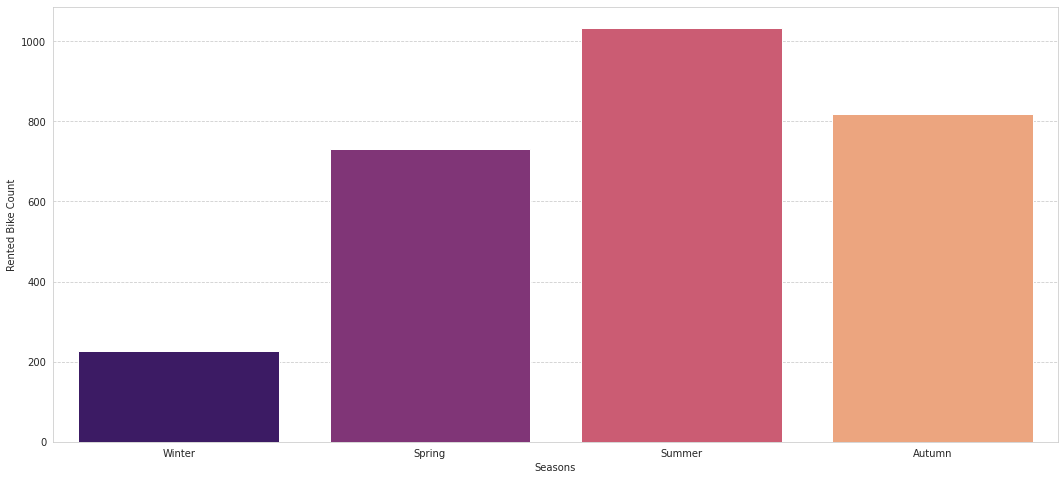

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=a_df,x='Seasons',y='Rented Bike Count',color='g',ci= None,palette='magma')


* Summer season has best bike sharing demand(over 1000) followed by autumn,spring and winter(200).

#**Analyze Numerical Variables**




In [ ]:
a_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekend'],
      dtype='object')

In [7]:
#storing all numeric features
features=['Rented Bike Count',  'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 
        'Rainfall(mm)', 'Snowfall (cm)'
      ]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


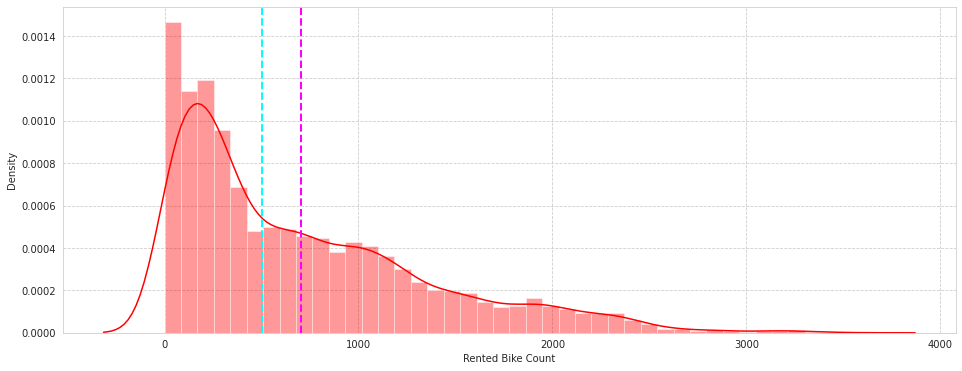

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


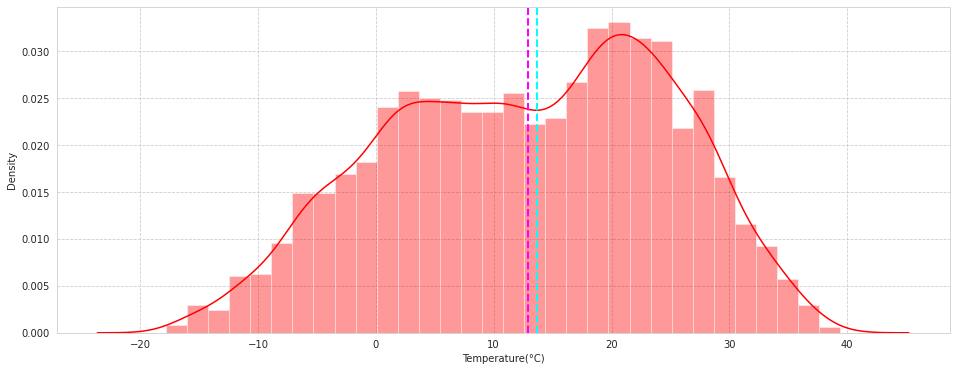

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


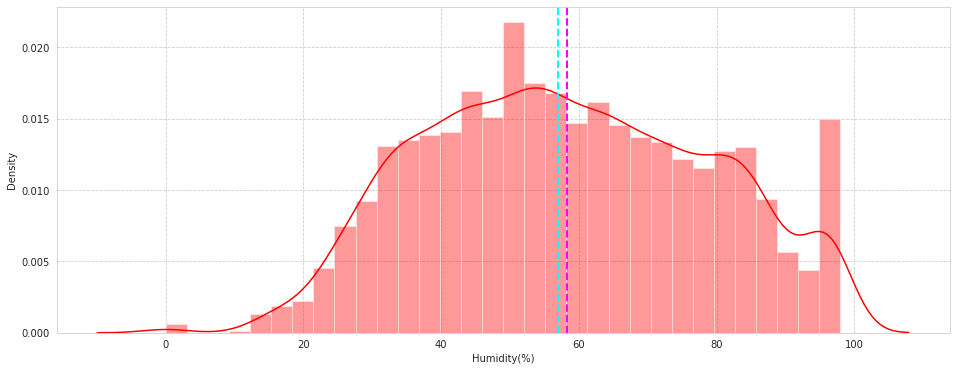

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


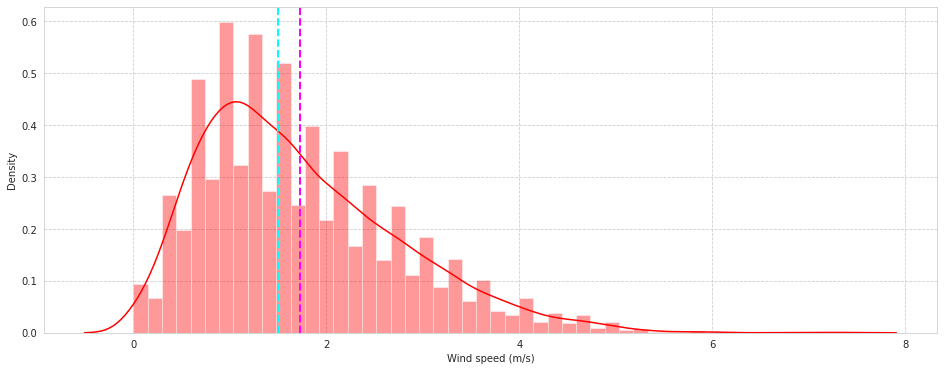

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


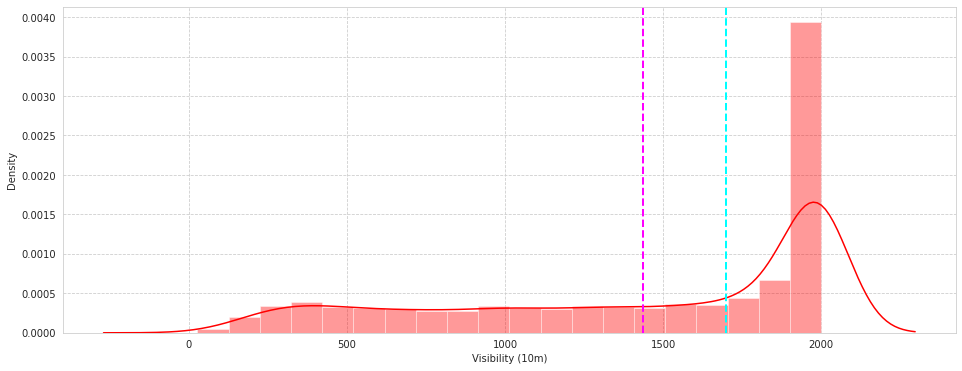

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


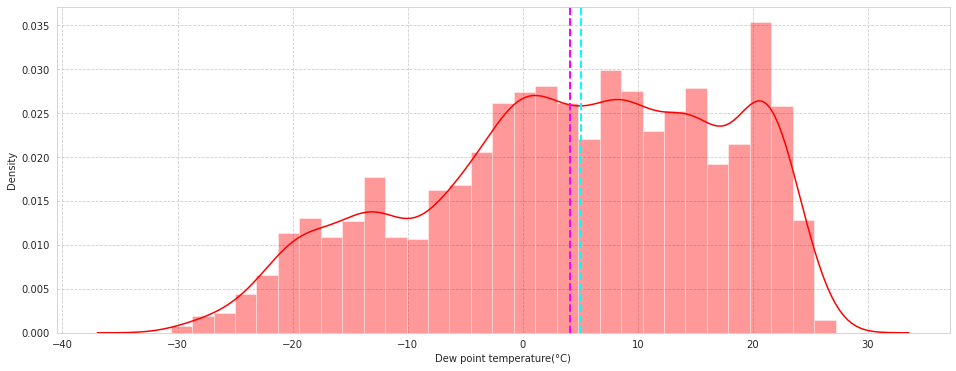

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


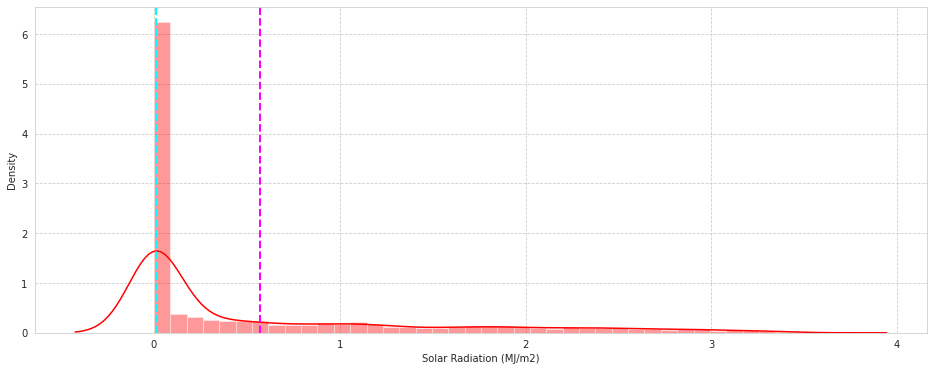

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


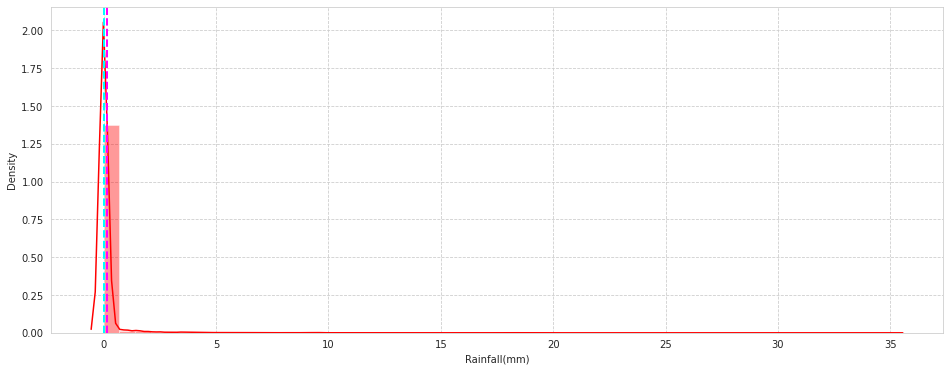

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


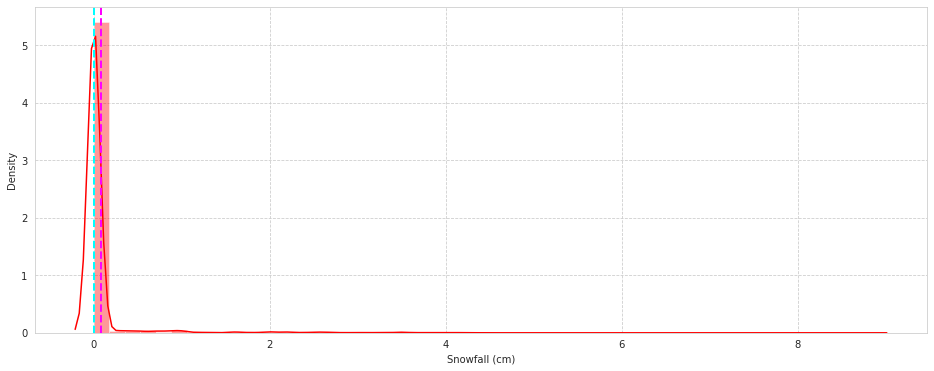

In [ ]:
for i in features:
  plt.figure(figsize=(16,6))
  sns.distplot(x=a_df[i],color='r')
  plt.xlabel(i)
  plt.axvline(a_df[i].mean(),color='magenta',linestyle='dashed',linewidth=2)
  plt.axvline(a_df[i].median(),color='cyan',linestyle='dashed',linewidth=2)
  plt.show()


* In density plot for **Rented Bike Count** we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its positively skewed.

* In density plot for **Temperature** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Humidity** we can see that mean is greater than median we can say to some extend that this is positively skewed.
* In density plot for **WindSpeed** we can see that mean is greater than median we can say to some extend that this is positively skewed.
* In density plot for **Visibility** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Dew Point Temperature** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Solar Radiation** we can see that mean is greater than median we can say that this is positively skewed.


#Feature Engineering

#Regression plot

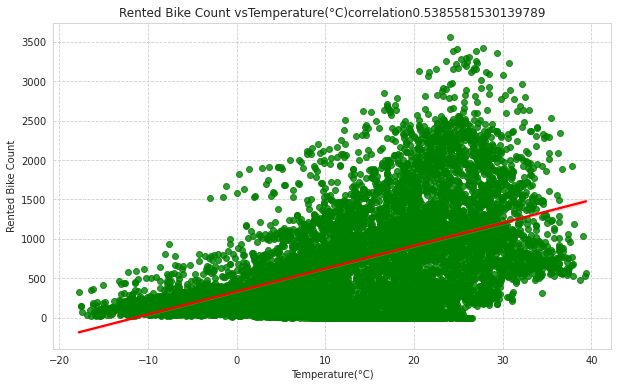

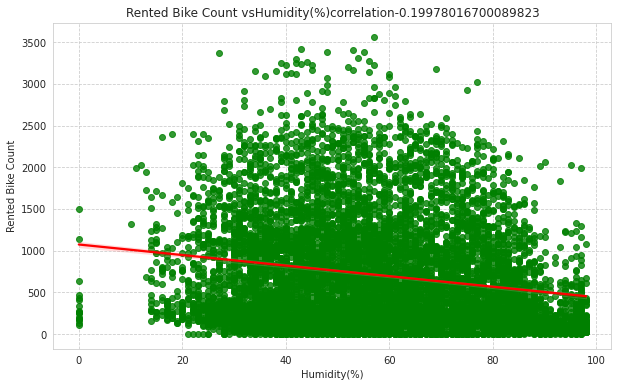

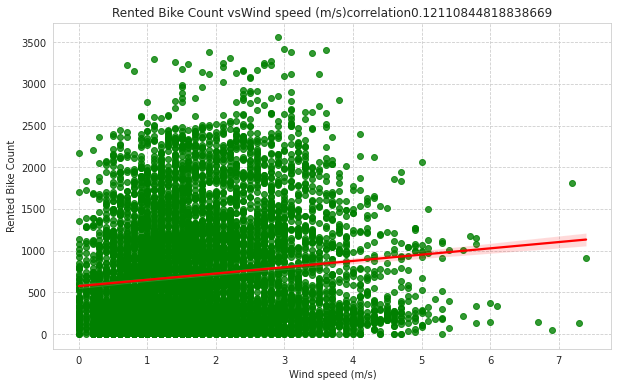

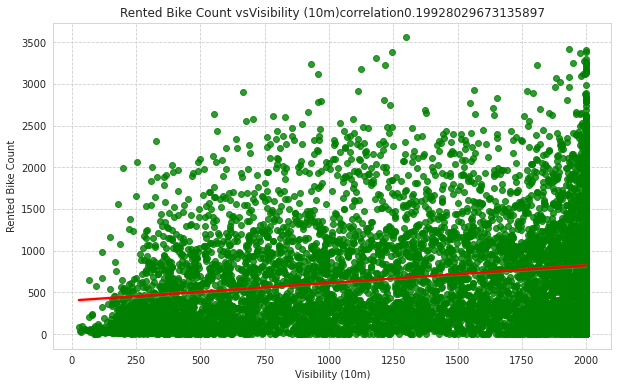

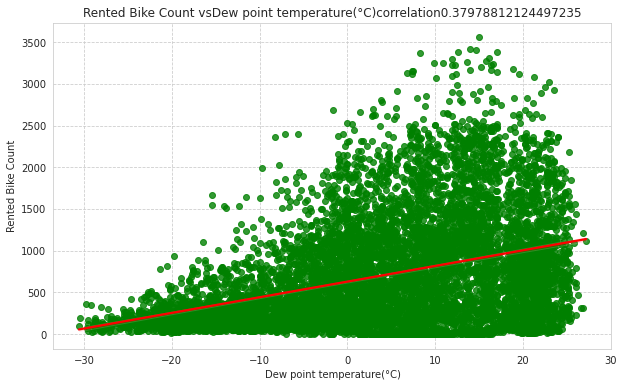

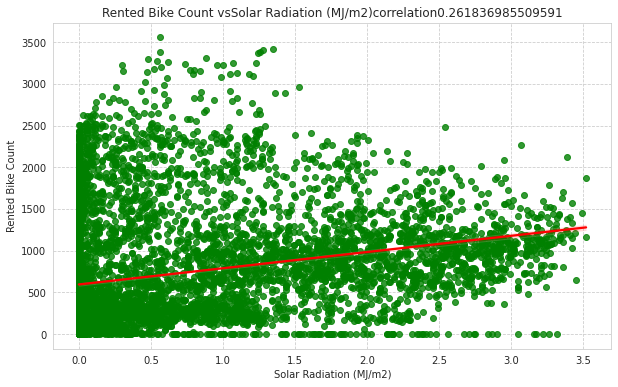

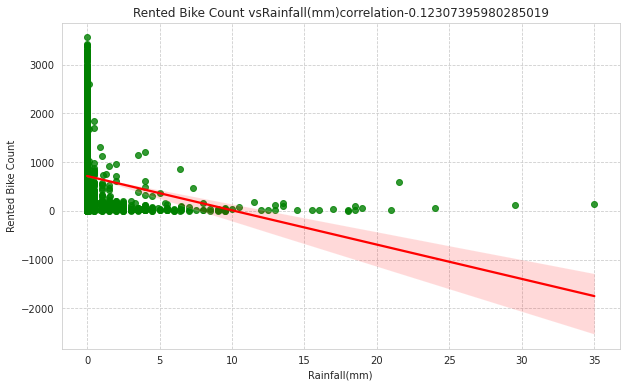

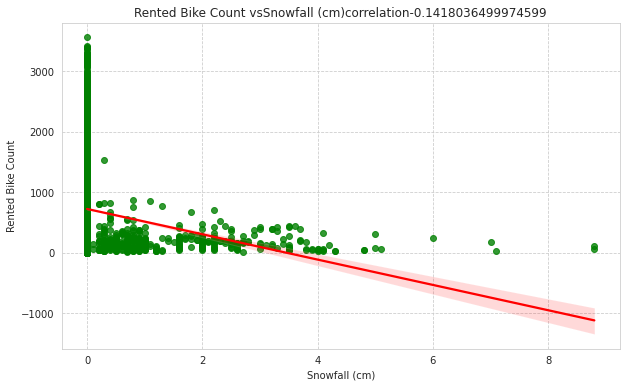

In [ ]:
#printing regresssion plot for all numeric values
for i in features[1:]:
  features=a_df[i]
  label=a_df['Rented Bike Count'] #it is dependent variable
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=a_df[i],y=a_df['Rented Bike Count'],scatter_kws={"color":'green'},line_kws={"color":'red'})
  correlation=features.corr(label)
  ax.set_title("Rented Bike Count vs" + i + 'correlation' + str(correlation))




 From the above regression plots we can conclude that the columns 
*   'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the dependent variaable.


*  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively correlated with the dependent variable.





#**Find Correlation in Variables**

In [ ]:
corrmat=a_df.corr()
cor_feature=corrmat.index
plt.figure(figsize=(12,12))


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
# Check the correlation plot

corr = a_df.corr()
corr.style.background_gradient(cmap="RdYlGn")

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Weekend
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.070861,0.215162,-0.032259
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,0.000000,-0.000000
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.049683,0.377796,-0.012972
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.047798,0.035925,-0.036750
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.082069,-0.003781,-0.022391
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.077888,0.052381,0.030650
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.065101,0.336350,-0.028966
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.030412,0.128086,0.008271
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.022794,0.027522,-0.014280
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.054758,-0.206418,-0.022557


* Green boxes are highly correlated box followed by orange and red boxes
* Temperature and Dew point temperature has highest correlation. Since for Linear Regression model, it is assumed that there is no multi-collinearity between Independent variables, we have remove multi-collinearity from this dataset 

#Checking VIF

In [ ]:
a_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,0


In [ ]:
a_df.drop("Date",axis=1,inplace=True)

In [ ]:
#defining function for VIF
def calc_vif(x):
  vif=pd.DataFrame
  vif['variables']=x.columns
  vif["VIF"]=[variance_infliation_factor(x.values,i) for i in range(x.shape[1])]

  return (vif)

In [ ]:
a_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekend'],
      dtype='object')

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   objec

In [ ]:
X= a_df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend']]

def cal_vif(X):
#the independent variable set


 # VIF dataframe
 vif_data = pd.DataFrame()
 vif_data["feature"] = X.columns

 #calculating vif for each feature
 vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

 return(vif_data)
cal_vif(X)



,feature,VIF
0,Rented Bike Count,4.137752
1,Hour,5.044601
2,Temperature(°C),36.729760
3,Humidity(%),5.684309
4,Wind speed (m/s),4.813024
5,Visibility (10m),9.108083
6,Dew point temperature(°C),17.571292
7,Solar Radiation (MJ/m2),2.914215
8,Rainfall(mm),1.104592
9,Snowfall (cm),1.121598


As Temperature has highest VIF followed by Dew Point Temperature we will remove temperature and check vif

In [ ]:
z=X.drop("Temperature(°C)",axis=1)
cal_vif(z)

,feature,VIF
0,Rented Bike Count,3.793188
1,Hour,4.803111
2,Humidity(%),5.619885
3,Wind speed (m/s),4.744626
4,Visibility (10m),5.532891
5,Dew point temperature(°C),2.135381
6,Solar Radiation (MJ/m2),1.934347
7,Rainfall(mm),1.104556
8,Snowfall (cm),1.112611
9,Weekend,1.404848


**After dropping temperature, VIF is in acceptable range, therefore we will drop temperature from our dataset**

In [ ]:
b_df=a_df.drop('Temperature(°C)',axis=1)

In [ ]:
#checking correlation after dropping temperature


corr=b_df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Weekend
Rented Bike Count,1.000000,0.410257,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.070861,0.215162,-0.032259
Hour,0.410257,1.000000,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,0.000000,-0.000000
Humidity(%),-0.199780,-0.241644,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.047798,0.035925,-0.036750
Wind speed (m/s),0.121108,0.285197,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.082069,-0.003781,-0.022391
Visibility (10m),0.199280,0.098753,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.077888,0.052381,0.030650
Dew point temperature(°C),0.379788,0.003054,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.065101,0.336350,-0.028966
Solar Radiation (MJ/m2),0.261837,0.145131,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.030412,0.128086,0.008271
Rainfall(mm),-0.123074,0.008715,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.022794,0.027522,-0.014280
Snowfall (cm),-0.141804,-0.021516,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.054758,-0.206418,-0.022557
Month,0.070861,0.000000,0.047798,-0.082069,0.077888,0.065101,-0.030412,-0.022794,0.054758,1.000000,-0.295561,0.009174


In [ ]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
 12  Day                        8760 non-null   object 
 13  Month                      8760 non-null   int64

**Ordinal encoding**

In [ ]:
b_df['Holiday']=b_df['Holiday'].map({'No Holiday':0,'Holiday':1})
b_df['Functioning Day']=b_df['Functioning Day'].map({'No':0,'Yes':1})

In [ ]:
b_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,0


In [ ]:
#One hot encoding
b_df_seasons=pd.get_dummies(b_df['Seasons'])
b_df_month=pd.get_dummies(b_df['Month'],prefix='Month')
b_df_hour=pd.get_dummies(b_df['Hour'],prefix='Hour')



In [ ]:
b_df.T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Rented Bike Count,254,204,173,107,78,100,181,460,930,490,...,761,768,837,1047,1384,1003,764,694,712,584
Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Humidity(%),37,38,39,40,36,37,35,38,37,27,...,20,20,23,29,34,34,37,39,41,43
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5,...,2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928,...,2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4,...,-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23,...,1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seasons,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,...,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn


In [ ]:
c_df=b_df.drop(columns = ['Hour', 'Seasons' ,'Month'],axis=1)

In [ ]:
c_df=b_df.join([b_df_seasons,b_df_month,b_df_hour])


In [ ]:
c_df.columns

Index(['Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekend',
       'Autumn', 'Spring', 'Summer', 'Winter', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='object')

#**Checking distribution Rented Bike count column data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


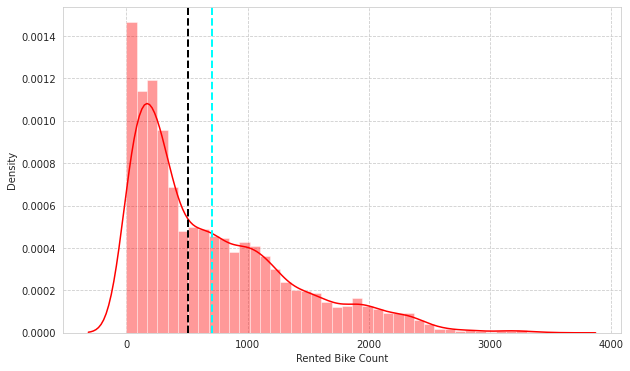

In [ ]:
# Distribution plot of Rented Bike Count

plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(c_df['Rented Bike Count'],hist=True ,color="red")
ax.axvline(c_df['Rented Bike Count'].mean(), color='cyan', linestyle='dashed', linewidth=2)
ax.axvline(c_df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

In density plot for Rented Bike Count we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its positively skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


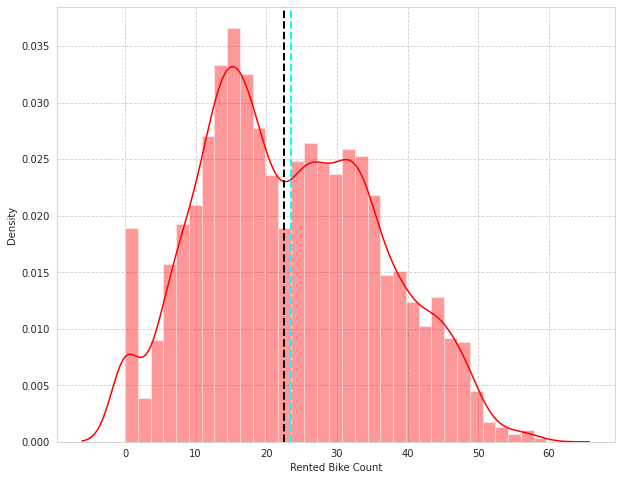

In [ ]:
#Applying square root to Rented Bike Count to reduce skewness

plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(c_df['Rented Bike Count']), color="red")
ax.axvline(np.sqrt(c_df['Rented Bike Count']).mean(), color='cyan', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(c_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

In [ ]:
#applying square root to rented bike count colummn
c_df['Rented Bike Count']=np.sqrt(c_df['Rented Bike Count'])

In [ ]:
# Defining function for plotting y test  and y train values
#It will help to get actual visulization of difference between predicted & actual value

def get_linear_graph(pred_value , y_test ):
  plt.figure(figsize=(15,7))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

In [ ]:
# defining function for feature importance
def get_feat_imp(model):
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  feat_importances.nlargest(10).plot(kind='barh', color= 'red')
  plt.show()

  

#**Data Preperation**

In [ ]:
#ceating copy of data
data=c_df.copy()

In [ ]:
#drop unnecessary colummns
data=data.drop(['Day','Seasons',"Hour",'Month','Year'],axis=1)

In [ ]:
data.head()

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,15.937377,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,14.282857,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13.152946,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10.344080,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.831761,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Humidity(%)                8760 non-null   int64  
 2   Wind speed (m/s)           8760 non-null   float64
 3   Visibility (10m)           8760 non-null   int64  
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Snowfall (cm)              8760 non-null   float64
 8   Holiday                    8760 non-null   int64  
 9   Functioning Day            8760 non-null   int64  
 10  Weekend                    8760 non-null   int64  
 11  Autumn                     8760 non-null   uint8  
 12  Spring                     8760 non-null   uint8  
 13  Summer                     8760 non-null   uint8

#**Pick appropriate Independent Variables, Test Train Split, Train model**

In [ ]:
#take all independent features
X=data.iloc[:,1:]
#DEPENDENT FEATURE
y=data.iloc[:,0]

In [ ]:
#splitting the dataset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [ ]:
#transforming data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#**Linear Regression**

In [ ]:
#fitting onto linear regression model
reg=LinearRegression().fit(X_train,y_train)

In [ ]:
#getting the X_train and X_test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#Evaluation matrix for Linear Regression

In [ ]:
#calculate MSE,MAE,R2 for trainning data

MSE1=mean_squared_error((y_train),(y_pred_train))
MAE=mean_absolute_error(y_train,y_pred_train)
R2=r2_score(y_train,y_pred_train)

In [ ]:
#calculate MSE,MAE,R2 for testing data

MSE1_test=mean_squared_error((y_test),(y_pred_test))
MAE_test=mean_absolute_error(y_test,y_pred_test)
R2_test=r2_score(y_test,y_pred_test)

In [ ]:
#printing errors
print('Trainning Errors\nMSE1:',MSE1,'\nMAE:',MAE,'\nR2:',round(R2,3))
print('Testing Errors\nMSE1_test:',MSE1_test,'\nMAE_test:',MAE_test,'\nR2_test:',round(R2_test,3))

Trainning Errors
MSE1: 37.352161123013445 
MAE: 4.644319757141869 
R2: 0.761
Testing Errors
MSE1_test: 36.21780331779815 
MAE_test: 4.564676954443265 
R2_test: 0.76


R2 score for linear regression model in training dataset is 0.761 and test data is 0.76
* so, we definetly say it is not overfit model. 
* MSE and MAE values for both training and test data are also low.
* so, it is a good model for prediction but still we search for better model

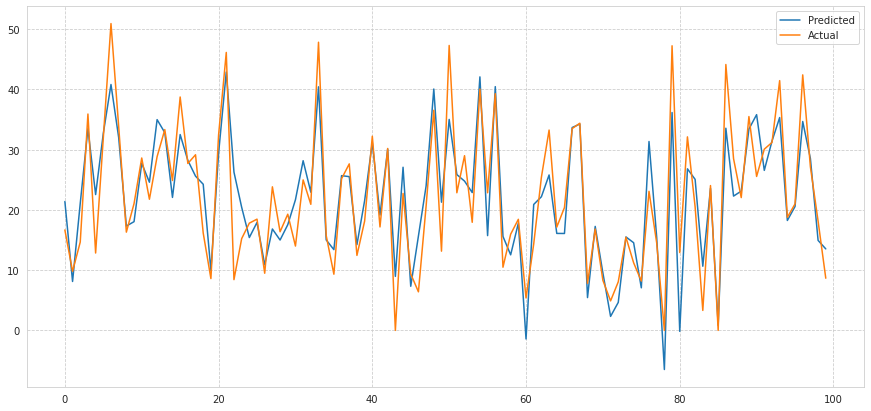

In [ ]:
get_linear_graph(y_pred_test,y_test)

In [ ]:
#storing the train set matrics value for later comparision
# storing the train set metrics value in a dataframe for later comparison

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE1),3),
       'R2_score':round((R2),3),
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#storing the test set matrics value for later comparision
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_test),3),
       'MSE':round((MSE1_test),3),
       'R2_score':round((R2_test),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

#**Polynomial Regression**

In [ ]:
#fitting training data in polynomial regression  model
poly_reg=PolynomialFeatures(degree=2)

In [ ]:
X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.transform(X_test)

In [ ]:
#fitting trainning data in polynomial regression model
poly=LinearRegression().fit(X_poly_train,y_train)

In [ ]:
#getting the y_train and y_test value
y_pred_poly_train=poly.predict(X_poly_train)
y_pred_poly_test=poly.predict(X_poly_test)

#Evaluation matrix for polynomial regression

In [ ]:
# Calculate MSE, MAE, R2 for training data

MSEp = mean_squared_error((y_train), (y_pred_poly_train))
MAEp= mean_absolute_error(y_train, y_pred_poly_train)
r2p = r2_score(y_train, y_pred_poly_train)

In [ ]:
# Calculate MSE, MAE, R2 for training data

MSEp_test=mean_squared_error((y_test),(y_pred_poly_test))
MAEp_test=mean_absolute_error(y_test,y_pred_poly_test)
r2p_test=r2_score(y_test,y_pred_poly_test)

In [ ]:
#printing errors
# Printing Errors

print('Training Errors\nMSE:', MSEp , '\nMAE:' , MAEp , '\nR2:',round((r2p),2))
print('\n\nTesting Errors\nMSE:', MSEp_test , '\nMAE:' , MAEp_test , '\nR2:',round((r2p_test),2))

Training Errors
MSE: 14.1509673185268 
MAE: 2.607308092188883 
R2: 0.91


Testing Errors
MSE: 16.795328902139108 
MAE: 2.87251476143409 
R2: 0.89


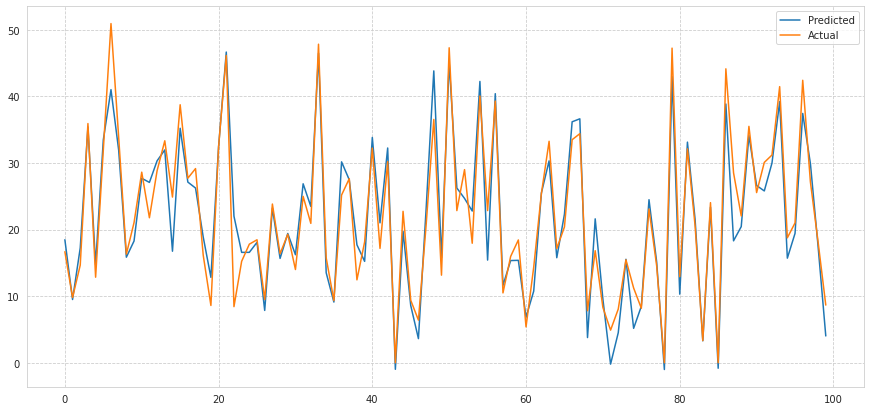

In [ ]:
get_linear_graph(y_pred_poly_test,y_test)

In [ ]:
#storing the train set matrics value for latter comparision
dict3= {'Model': 'polynomial regression',
        'MAE':round(MAEp,3),
        'MSE':round(MSEp,3),
        'R2_score': round(r2p,3)
    
       }
training_df=training_df.append(dict3,ignore_index=True)

In [ ]:
#storing test set matrics value
dict4= {'Model': 'polynomial regression',
        'MSE':round(MSEp_test,3),
        'MAE':round(MAEp_test,3),
        'R2_score':round(r2p_test,3)}
test_df=test_df.append(dict4,ignore_index=True)

#**Decision Tree Regressor**

In [ ]:
# Creating object wth Decision tree regressor with critera of mean squared error, maximum depth being 10, maximum leaf noodes being  200
decision_regressor=DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_leaf_nodes=200)
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=200)

In [ ]:
#getting the y_train and y_test value
y_pred_train_d=decision_regressor.predict(X_train)
y_pred_test_d= decision_regressor.predict(X_test)

#Evaluation Matrix of Decision Tree Regressor

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSEdt = mean_squared_error((y_train), (y_pred_train_d))
MAEdt = mean_absolute_error(y_train, y_pred_train_d)
r2dt = r2_score(y_train, y_pred_train_d)

In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestdt = mean_squared_error((y_test), (y_pred_test_d))
MAEtestdt = mean_absolute_error(y_test, y_pred_test_d)
r2testdt = r2_score(y_test, y_pred_test_d)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEdt , '\nMAE:' , MAEdt , '\nR2:',round((r2dt),3))
print('\n\nTesting Errors\nMSE:', MSEtestdt , '\nMAE:' , MAEtestdt , '\nR2:',round((r2testdt),3))

Training Errors
MSE: 24.715448527413255 
MAE: 3.6151056157960966 
R2: 0.842


Testing Errors
MSE: 30.48214244817496 
MAE: 4.005385023326545 
R2: 0.798


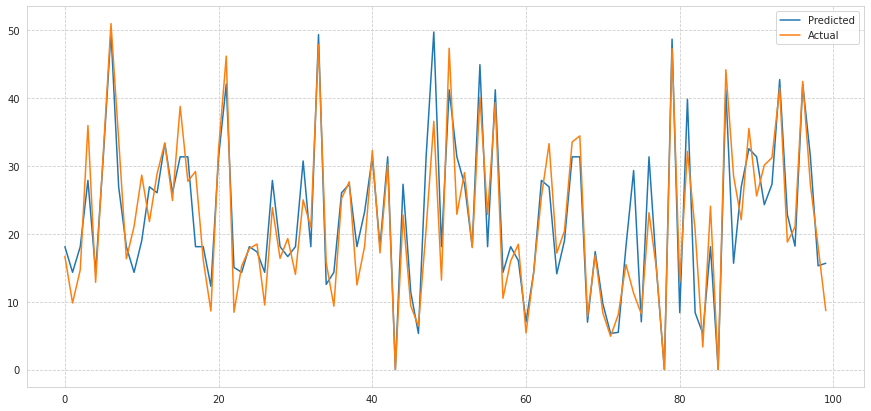

In [ ]:
get_linear_graph(y_pred_test_d,y_test)

In [ ]:
#storing the train set matric value
# storing the train set metrics value in a dataframe for later comparison
dict5={'Model':'Decision Tree Regression ',
       'MAE':round((MAEdt),3),
       'MSE':round((MSEdt),3),
       'R2_score':round((r2dt),3),
}
training_df=training_df.append(dict5,ignore_index=True)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict6 = {'Model':'Decision Tree Regression ',
       'MAE':round((MAEtestdt),3),
       'MSE':round((MSEtestdt),3),
       'R2_score':round((r2testdt),3),
}
test_df=test_df.append(dict6,ignore_index=True)

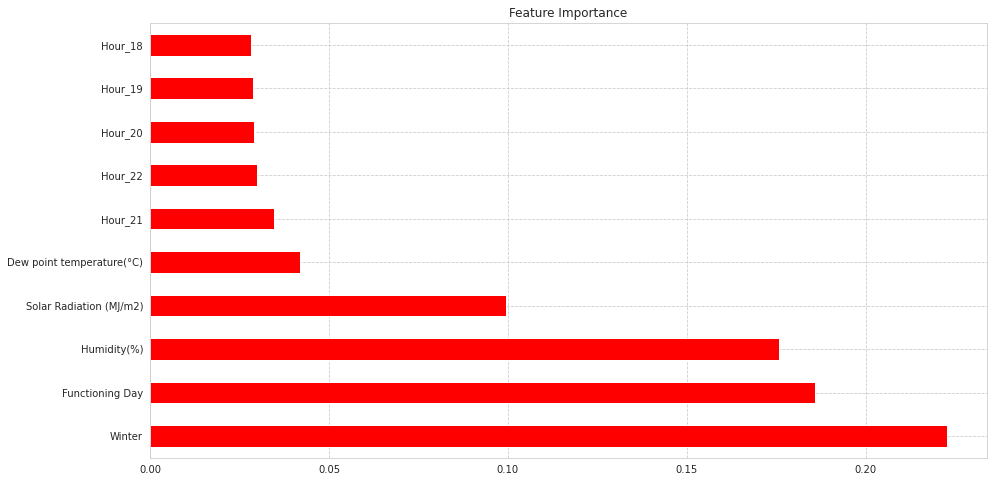

In [ ]:
get_feat_imp(decision_regressor)

* We can show Winter is showing highest feature importance.
* Hour 18 and 19,20 shows less feature importance

#**Random Forest Regressor**

In [ ]:
rfc=RandomForestRegressor(n_estimators=180,random_state=12,criterion='squared_error',max_depth=12,max_leaf_nodes=84)
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, max_leaf_nodes=84, n_estimators=180,
                      random_state=12)

In [ ]:
#prediction on train dataset
y_pred_trainrfc=rfc.predict(X_train)

In [ ]:
#prediction on test dataset
y_pred_testrfc=rfc.predict(X_test)

#**Evaluation matrix for random forest regressor**

In [ ]:
#calculate MSE,MAE,R2 for trainning data
MSErfc=mean_squared_error(y_train,y_pred_trainrfc)
MAErfc=mean_absolute_error(y_train,y_pred_trainrfc)
r2rfc=r2_score(y_train,y_pred_trainrfc)


In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestrf = mean_squared_error((y_test), (y_pred_testrfc))
MAEtestrf = mean_absolute_error(y_test, y_pred_testrfc)
r2testrf = r2_score(y_test, y_pred_testrfc)

In [ ]:
#printing errors
print('Trainning Errors\nMSE:',MSErfc,'\nMAE:',MAErfc,'\nr2:',round(r2rfc,3))
print('\n\nTesting Errors\nMSE:', MSEtestrf , '\nMAE:' , MAEtestrf , '\nR2:',round((r2testrf),3))

Trainning Errors
MSE: 19.547610124997167 
MAE: 3.3107815356966492 
r2: 0.875


Testing Errors
MSE: 22.12148543100839 
MAE: 3.424461188207054 
R2: 0.854


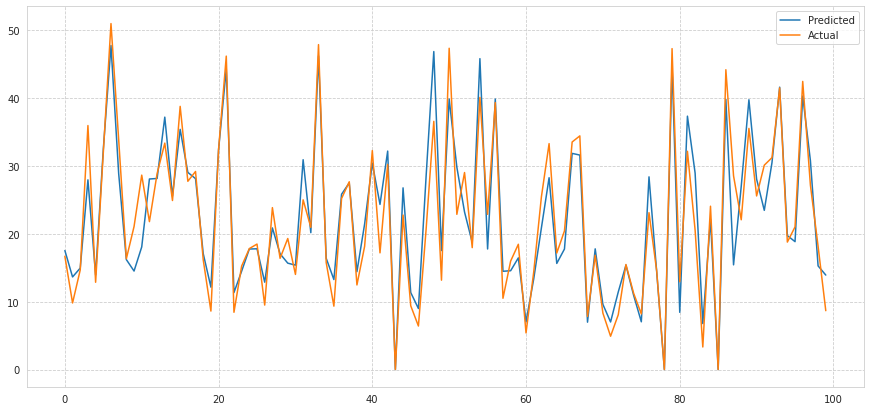

In [ ]:
get_linear_graph(y_pred_testrfc,y_test)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict7={'Model':'Random Forrest ',
       'MAE':round((MAErfc),3),
       'MSE':round((MSErfc),3),
       'R2_score':round((r2rfc),3)}
       
training_df=training_df.append(dict7,ignore_index=True)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict8={'Model':'Random Forrest ',
       'MAE':round((MAEtestrf),3),
       'MSE':round((MSEtestrf),3),
       'R2_score':round((r2testrf),3)}
       
test_df=test_df.append(dict8,ignore_index=True)

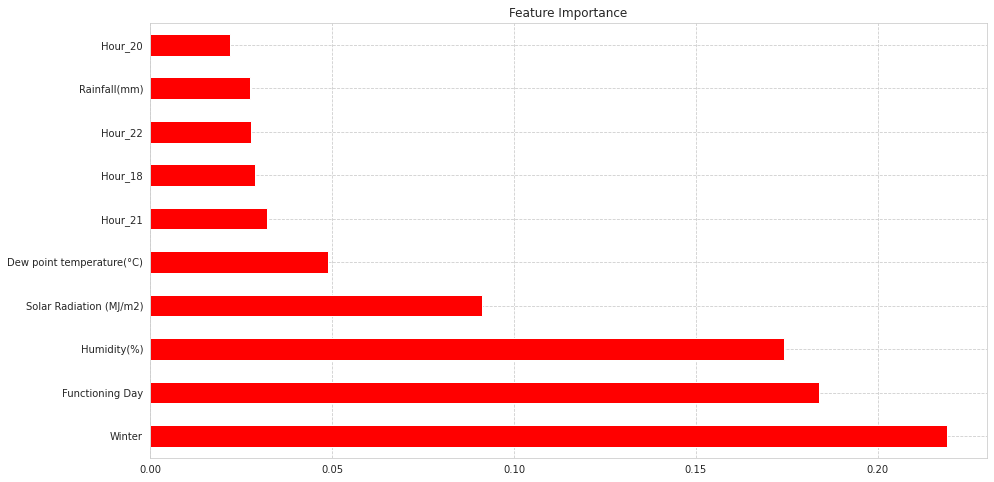

In [ ]:
get_feat_imp(rfc)

* Here we can see Hour_20 is showing less feature importance while Winter season is showing highest feature importance in model prediction.

#**GradientBoost with GridSearch**

In [ ]:
param_dict={'n_estimators': [50,80,100],
            'max_depth': [4,6,8,10],
            'min_samples_split':[50,80,100],
            'min_samples_leaf':[40,50]
            }

In [ ]:
gb=GradientBoostingRegressor()

In [ ]:
#Grid search
gb_grid=GridSearchCV(estimator=gb,
                 param_grid=param_dict,
                 cv=5,
                 verbose=0)

In [ ]:
gb_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100],
                         'n_estimators': [50, 80, 100]})

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=80)

In [ ]:
#putting best possible parameter into moddel
gb_best_model=gb_grid.best_estimator_

In [ ]:
#making prediction on train and test dataset
y_pred_traingb=gb_best_model.predict(X_train)
y_pred_testgb=gb_best_model.predict(X_test)

In [ ]:

#Calculate MSE,MAE,R2 for trainning data
MSEgb=mean_squared_error(y_train,y_pred_traingb)
MAEgb=mean_absolute_error(y_train,y_pred_traingb)
r2gb=r2_score(y_train,y_pred_traingb)

In [ ]:
#Calculate MSE,MAE,R2 for testing data
MSEtestgb=mean_squared_error(y_test,y_pred_testgb)
MAEtestgb=mean_absolute_error(y_test,y_pred_testgb)
r2testgb=r2_score(y_test,y_pred_testgb)

In [ ]:
#printing errors
# Printing Errors

print('Training Errors\nMSE:', MSEgb , '\nMAE:' , MAEgb , '\nR2:',round((r2gb),3))
print('\n\nTesting Errors\nMSE:', MSEtestgb , '\nMAE:' , MAEtestgb , '\nR2:',round((r2testgb),3))

Training Errors
MSE: 8.627750557153538 
MAE: 2.015903026054293 
R2: 0.945


Testing Errors
MSE: 12.733720673058976 
MAE: 2.4930521620341244 
R2: 0.916


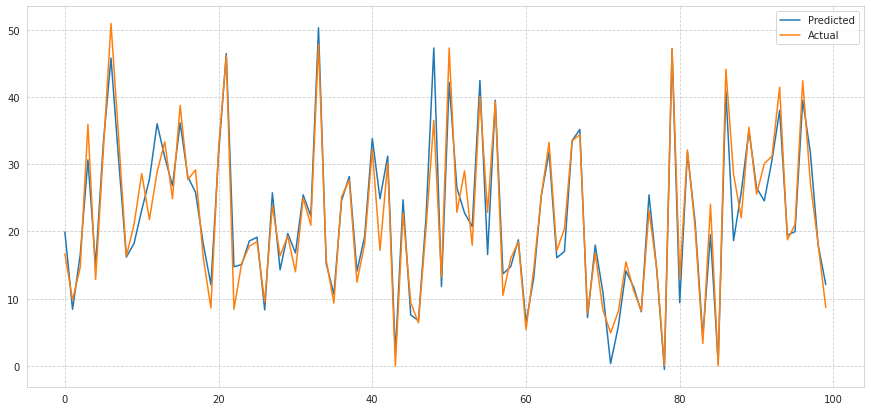

In [ ]:
get_linear_graph(y_pred_testgb,y_test)

In [ ]:
#storing the train set matrics value
dict8={'Model': 'Gradient Boost with GridSearch',
       'MSE': round(MSEgb,3),
       'MAE': round(MAEgb,3),
       'R2_score': round(r2gb,3)

       }
training_df=training_df.append(dict8,ignore_index=True)

In [ ]:
#storing the test set matrics value
dict9={'Model': 'Gradient Boost with GridSearch',
       'MSE': round(MSEtestgb,3),
       'MAE': round(MAEtestgb,3),
       'R2_score': round(r2testgb,3)

       }
test_df=test_df.append(dict9,ignore_index=True)

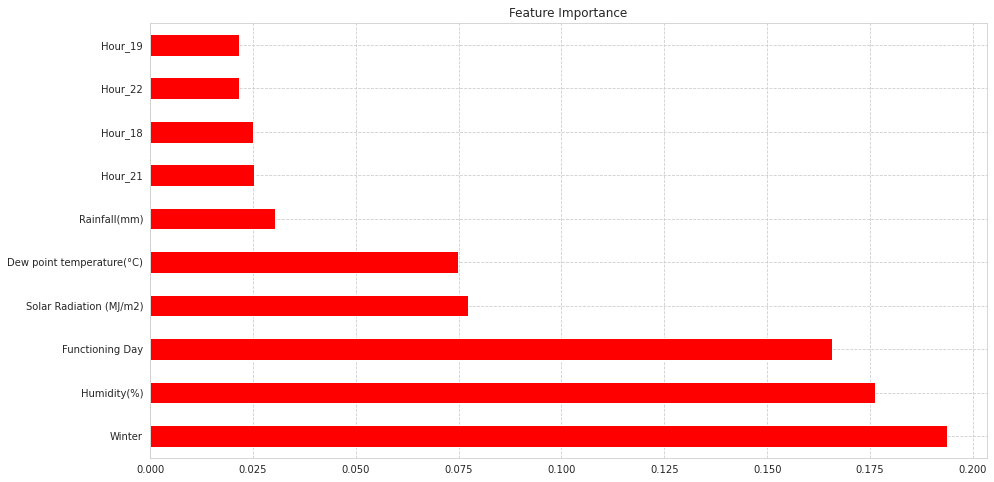

In [ ]:
get_feat_imp(gb_best_model)

* Winter Season is showing highest feature importance and Hour 19 is showing less feature importance in this model prediction

In [ ]:
#combining training and test error in single frame
new_matrix=pd.concat([training_df,test_df],keys=['Training Set','Test Set'],axis=1)

In [ ]:
new_matrix

Training Set                          \
                            Model    MAE     MSE R2_score   
0              Linear regression   4.644  37.352    0.761   
1           polynomial regression  2.607  14.151    0.909   
2       Decision Tree Regression   3.615  24.715    0.842   
3                 Random Forrest   3.311  19.548    0.875   
4  Gradient Boost with GridSearch  2.016   8.628    0.945   

                         Test Set                          
                            Model    MAE     MSE R2_score  
0              Linear regression   4.565  36.218    0.760  
1           polynomial regression  2.873  16.795    0.889  
2       Decision Tree Regression   4.005  30.482    0.798  
3                 Random Forrest   3.424  22.121    0.854  
4  Gradient Boost with GridSearch  2.493  12.734    0.916

In [ ]:
comp=test_df[['Model','R2_score']]
comp=comp.sort_values(by="R2_score",ascending=False)

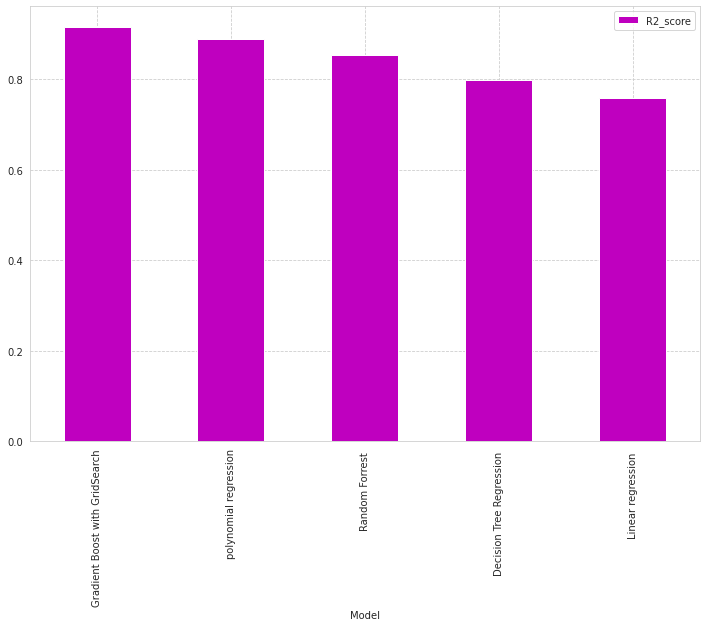

In [ ]:
comp.plot(x="Model",y="R2_score",color='m',kind='bar',figsize=(12,8))

Here we can see that `GradientBoost with Gridsearch` gives `highest R2 score` in **both training and test dataset**. 
  * Therefore we can say that it gives us optimal result in term of test dataset.
  * It is best for final prediction

#**Model Explainability**

#SHAP(Shapely additive explanation)

**SHAP INTERPRETATION**
  * BASE VALUE: This is the average feature value. It is used to determine whether the prediction is true or false
  * Red Colour Block: The feature which represents that the prediction is positive. Higher this value will push the prediction positively
  * Blue Colour Block: This feature represents that the prediction is negative. Higher this value will push the prediction negatively.
  * Block Size: The block size shows the feature importance. Larger the block size, larger will the feature importance value.

In [ ]:
!pip install shap
from sklearn.tree import export_graphviz
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Creating function for getting shape OF tree based model with JS visualization using SHAP in notebook environment**

In [ ]:
def get_shap(model):
  sns.set_style('darkgrid')
  for_instance=2
  shap.initjs() #to get js visualization
  explainer=shap.TreeExplainer(model)

  #using explainer.shap_values to get shap values of each feature
  shap_values=explainer(X_test,check_additivity=False)

  #getting the names of feature and plotting the same using feature_names from X's features as X.columns
  return shap.plots.force(shap_values[for_instance],feature_names=X.columns)

#**Creating Function to get SHAP summary**

In [ ]:
def get_shap_summary(model):
  model.fit(X_test,y_test)
  explainer=shap.TreeExplainer(model)
  #using explainer.shap_values to get shap values of each feature
  shap_values=explainer.shap_values(X_test,check_additivity=False)
  #getting the names of feature and plotting the same using feature_names from X's features as X.columns
  return shap.summary_plot(shap_values,X_test,feature_names=X.columns)

In [ ]:
def get_shap_summary2(model):
  model.fit(X_test,y_test)
  explainer=shap.TreeExplainer(model)
  #using explainer.shap_values to get shap values of each feature
  shap_values=explainer.shap_values(X_test,check_additivity=False)
  #getting the names of feature and plotting the same using feature_names from X's features as X.columns
  return shap.summary_plot(shap_values,X_test,plot_type='bar',feature_names=X.columns)

#**SHAP** for DecisionTree Regressor

In [ ]:
#calling fn to get shap js visualization
get_shap(decision_regressor)

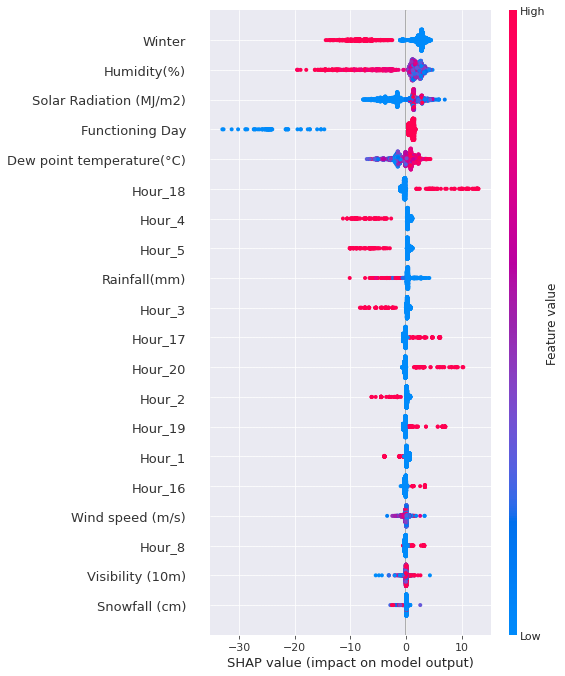

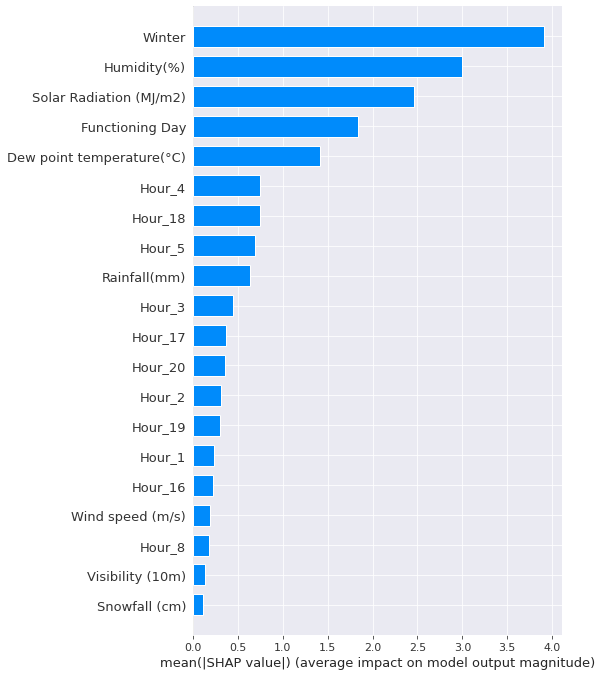

In [ ]:
#calling fn to get shap summary
get_shap_summary(decision_regressor)
get_shap_summary2(decision_regressor)

* Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.
* We can see from SHAP summary that high Hour_18 value increases predicted bike demand
* Low snowfall value also increasing predicted bike sharing demand
* Humidity is highly negatively correlated with bike share demand
* In bar graph we can see winter has the highest feature value while snowfall has the lowest feature value

#**SHAP** for RandomForest Regressor

In [ ]:
#callling function to get shap_js visualization
get_shap(rfc)

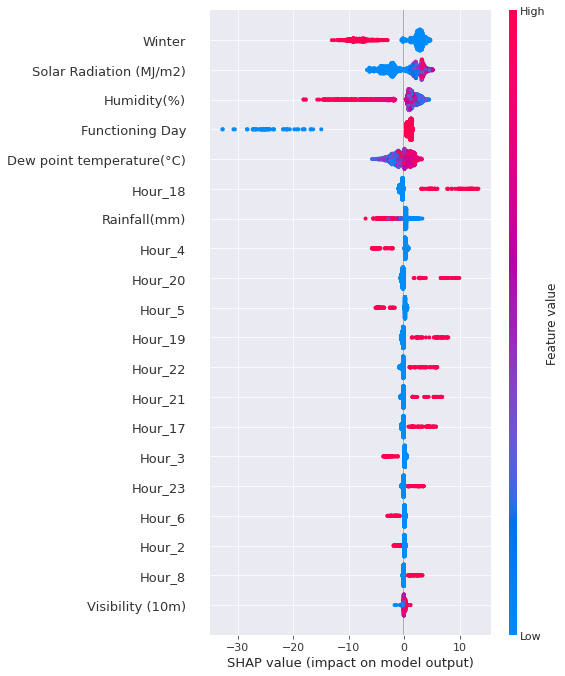

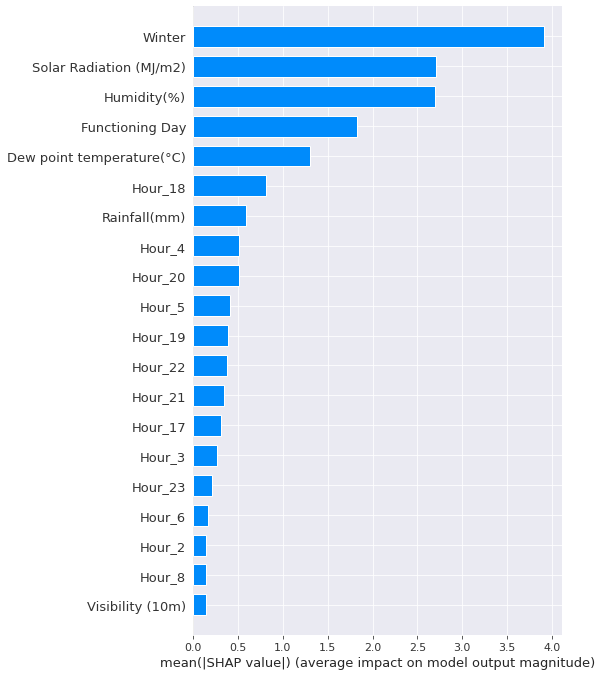

In [ ]:
#calling fn to get shap summary
get_shap_summary(rfc)
get_shap_summary2(rfc)

* we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.
* Also we can see from SHAP summary that **Hour_18** value increasing predicted bike sharing demand.
* Here also humidity and winter season is highly negatively correlated with predicted bike sharing demand
* In bar graph we can see **Winter** has the highest feature value while **Hour_8 and visibility** have the Lowest feature_value

#**SHAP** for Gradient Boost with Gridsearch

In [ ]:
#calling function to get shap JS visualization
get_shap(gb_grid.best_estimator_) #using bestestimator of gradient boost using Grid search CV so to shap

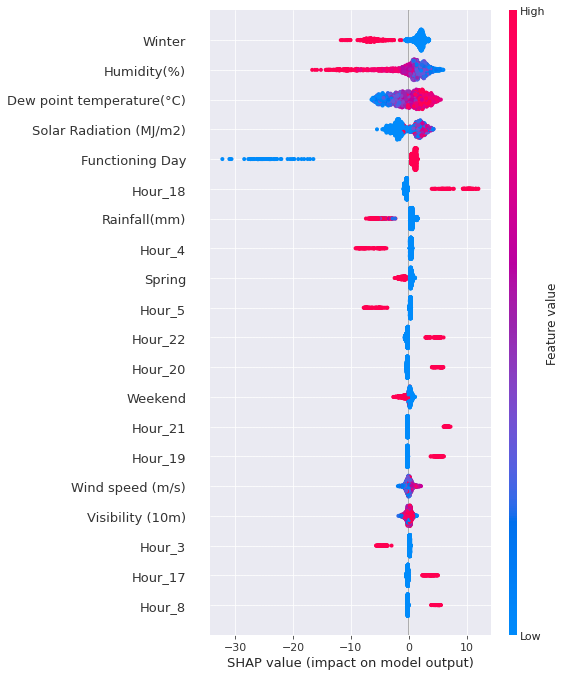

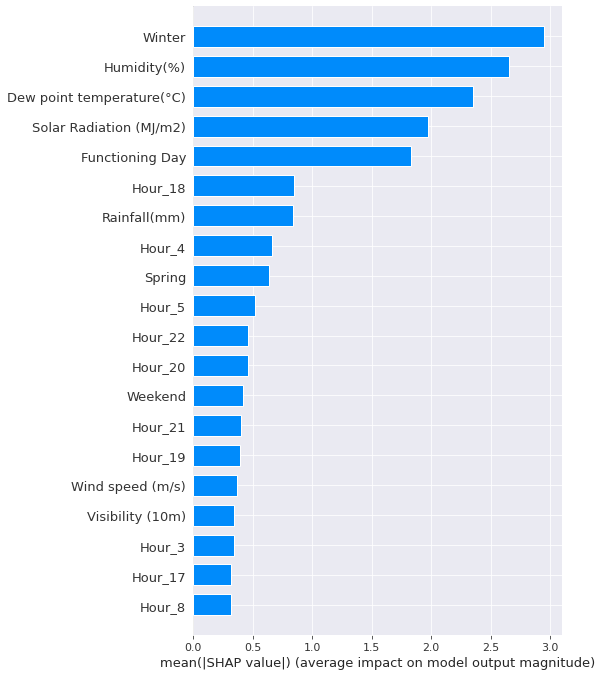

In [ ]:
#calling functions to get shap summary
get_shap_summary(gb_grid.best_estimator_)
get_shap_summary2(gb_grid.best_estimator_)

* we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.
* Also we can see from SHAP summary that **Hour_18** value increasing predicted bike demand.
* Here also humidity and winter season is highly negatively correlated with predicted bike sharing demand 
* In bar graph we can see **Winter** has the highest feature value while **Hour_8** has the Lowest feature_value

#**Conclusion**

1) In June maximum bike rented near 1000. and january, february enjoys less rented bike demand near 400.
March and June enjoys more bike sharing demand in holiday than non-holidays
February,December have less bike sharing demand for both in holidays and non-holidays.
April,october,december months have nearly zero bike sharing demand in holidays.

2) weekdays have more rented bike demand than weekend

3)In weekdays 6 pm and 8 am but in weekend only 6 pm are peak time of bike sharing demand.
4 and 5 am has lowest bike sharing demand in both weekeend and weekdays

4) Summer season enjoys overall best and least bike sharing demand and winter has overall less demand than any other season. There are very less bike sharing demand in morning 4 and 5 am
 
5) From the regression plots we can conclude that the columns 
*   'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the dependent variable 'Rented Bike Count'. This means when Rainfal,snowfal,humidity is higher bike sharing demand is lower.


*  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively correlated with the dependent variable 'Rented Bike Demand'. This means if 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are higher or lower then bike sharing demand maybe higher or lower respectively.



6) After applying linear regression model, we got r2 score of 0.761 for training dataset and 0.76 for test dataset which defines that model is optimally fit for training and test data i.e no overfitting

7) Therefore, for even better fit, we applied polynomial regression model with degree = 2, we got R2 score of 0.91 for training data and 0.89 for test data

8)  We also tried Tree based classifiers for our data, we applied Decision Tree Regressor, since decision tree is prone to overfit, we gave certain parameters like maximum depth of the tree, maximum leaf nodes etc, with that we  we got R2 score of 0.842 for training data and 0.798 for test data which is less than polynomial regression.

10)  To get better accuracy on tree based model, we applied Random forest with n_estimator as 180 and with maximum depth as 12, with that we got R2 score of 0.875 for training data and 0.854 for test data.

11) Finally, we applied Gradient boost with parameters selected after grid search which resulted in highest R2 score of 0.945 for training data and 0.916 for test data with very less mean squared error of 8.6 and 12.4 in training as well as in test data.

Therefore we can say that it gives us optimal result in term of test dataset.
It is best for final prediction

12)  Lastly, In bar graph we can see **Winter** has the highest feature value.We can conclude that Hour_8,Visibility and Wind Speed is not contributing in Decision Tree,Random Forest and Gradient Boost in model prediction